# Évolution des sondages pour la présidentielle française de 2022

In [111]:
import pandas as pd
import datetime
z=pd.read_csv("https://github.com/nsppolls/nsppolls/raw/master/presidentielle.csv")
z["date"]=pd.to_datetime(z.fin_enquete)
z=z[z.tour=="Premier tour"][["date","candidat","intentions"]]
z=pd.pivot_table(z, index=['date'], columns='candidat', values='intentions') # mise en forme
z=z.reset_index()

In [112]:
liste_retenue=['Anne Hidalgo', 'Emmanuel Macron','Eric Zemmour', 'Fabien Roussel', 'Jean Lassalle','Jean-Luc Mélenchon', 'Marine Le Pen','Nathalie Arthaud', 'Nicolas Dupont-Aignan', 'Philippe Poutou', 'Valérie Pécresse', 'Yannick Jadot']
len(liste_retenue)

12

In [113]:
z=z[z.date>datetime.datetime(2022,1,1)].set_index("date")
z=z[liste_retenue]
z['tot']=z.sum(axis=1)
# renormalisation pour les seuls retenus
for c in z.columns:
    if c=='tot':
        continue
    z[c]=z[c]/z.tot*100

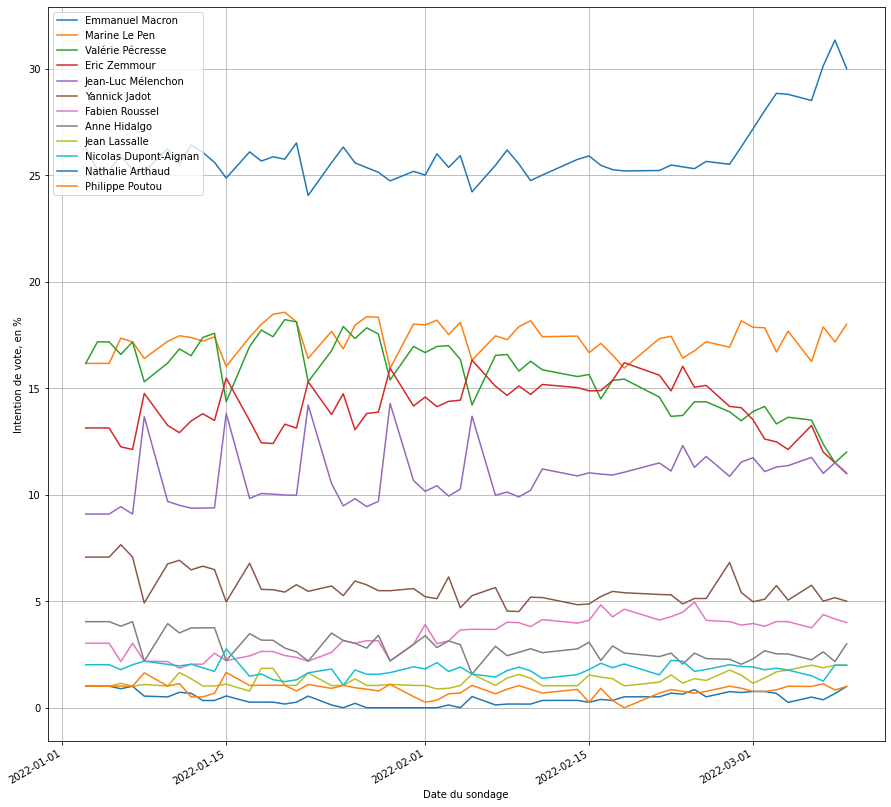

In [137]:
# ordonnancement en fonction des dernières intensions de vote
liste_ordonnee=list(z[z.index==z.index.max()][liste_retenue].transpose().sort_values(by=z.index.max(),ascending=False).index)

ax=z[liste_ordonnee].plot(figsize=(15,15))
ax.legend(loc='upper left')

ax.set_ylabel('Intention de vote, en %')
ax.set_xlabel('Date du sondage')
ax.grid()